In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import fsolve

years = [1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]
rice_production = [-39.69, -7.51, -44.61, 0, -32.53, -43.36, -59.23, -76.33, -85.63, -23.83, -30.49, -29.0]
positive_rice_production = [(val + 100.0) * 3 for val in rice_production]

def system(t, y, Eh, *params):
  S, L, G = y

  a1, a2, b1, b5, c1, c2, c3 = params

  #Sparrows live 3 years on average
  a3 = 1/3

  #Locusts die and lay new eggs every year
  b4 = 1

  #Locusts multiply about 15% faster while gregarious
  b2 = 0.15 * b1

  #To make the locusts swarms turn on quickly
  b3 = 0.01

  c3 = 1



  def f(L):
    return b1 + (b2 * L**2) / (b3**2 + L**2)

  dS = (a1 * S * L) + (a2 * G * S) - (a3 * S) - (Eh * S)
  dL = f(L) * L - (b4 * L) - (b5 * S * L)
  dG = 1 - (c1 * G * S) - (c2 * G * L) - (c3 * G)

  return [dS, dL, dG]

#         a1,    a2,   b1,   b5,    c1,    c2,    c3
params = [0.001, 0.00, 1.50, 0.005, 0.001, 0.005, 0.05]

S0 = 10
L0 = 100
G0 = positive_rice_production[0]




t_span = (0, 12)
t_eval = np.linspace(0, 12, 100)


def run_simulation(Eh=0.0, S0=S0, L0=L0, G0=G0):
  """Simulate and optionally plot the system for given hunting/farming efforts."""
  y0 = [S0, L0, G0]
  sol = solve_ivp(system, t_span, y0, t_eval=t_eval, args=(Eh, *params))
  plt.figure(figsize=(8,5))
  plt.plot(sol.t, sol.y[0], label=f'Sparrows')
  plt.plot(sol.t, sol.y[1], label=f'Locusts')
  plt.plot(sol.t, sol.y[2], label=f'Grain')
  # plt.plot(sol.t, positive_rice_production, label=f'Chicago Rice Data')
  plt.xlabel('Time (years)')
  plt.ylabel('Individuals / Index')
  plt.title(f'Simulation: Eh={Eh}')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Year |   S (sparrows)   |   L (locusts)   |   G (grain)")
  print("-" * 52)
  for year, S, L, G in zip(years, *sol.y):
    print(f"{year:<5} | {S:>15.3f} | {L:>15.3f} | {G:>15.3f}")




# S0, L0, G0 = findSteadyState(0.001, 0.005)
# ratio = G0 / positive_rice_production[0]
# S0, L0, G0 = S0 * ratio, L0 * ratio, G0 * ratio


In [5]:
"""
A couple nice functions that report steady states and their equilibrium.
"""
def report_steady_state(S: float, L: float, G: float):
    print(f"Sparrow population: {S:.3f}")
    print(f"Locust population: {L:.3f}")
    print(f"Grain: {G:.3f}")

def report_equilibrium(*eigenvalues: float):
    """
    Prints eigenvalues and classifies stability.

    TODO: Due to floating point, an == 0 check is unlikely. We may consider
    having some small value epsilon, and use this to check if things are zero.
    """
    for i, lam in enumerate(eigenvalues, start=1):
        print(f"λ_{i} = {lam}")

    # Use real parts when deciding stability
    eps = 1e-12
    reals = [lam.real for lam in eigenvalues]

    has_pos = any(r > eps for r in reals)
    has_neg = any(r < -eps for r in reals)
    has_zero = any(abs(r) <= eps for r in reals)

    if has_zero:
        print("Classification: equilibrium with a zero eigenvalue (nonhyperbolic)")
    elif has_pos and has_neg:
        print("Classification: unstable saddle equilibrium")
    elif has_pos and not has_neg:
        print("Classification: unstable equilibrium")
    elif has_neg and not has_pos:
        print("Classification: stable equilibrium")
    else:
        print("Classification: unable to classify (unexpected case)")


--- Simulation 1 with params [0.00874157 0.08838958 1.39994189 0.00508548 0.00890777 0.00987217
 0.03905073] ---


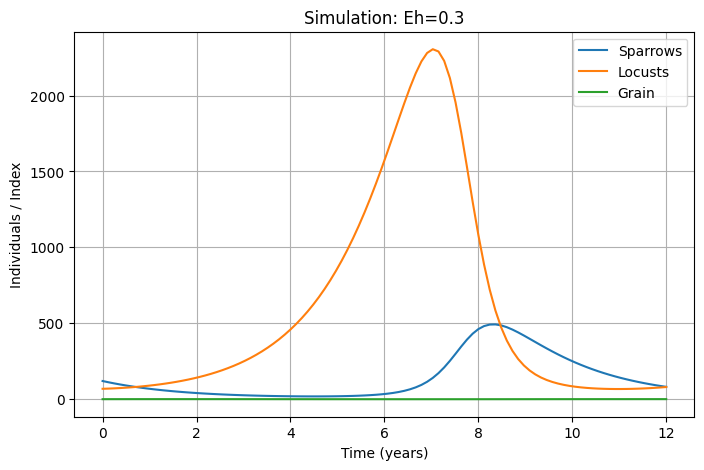

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         119.936 |          68.770 |           0.364
1955  |         112.011 |          69.993 |           0.416
1956  |         104.627 |          71.567 |           0.460
1957  |          97.751 |          73.495 |           0.496
1958  |          91.350 |          75.778 |           0.526
1959  |          85.394 |          78.427 |           0.551
1960  |          79.853 |          81.451 |           0.571
1961  |          74.702 |          84.865 |           0.587
1962  |          69.913 |          88.689 |           0.600
1963  |          65.463 |          92.945 |           0.610
1964  |          61.329 |          97.659 |           0.617
1965  |          57.492 |         102.860 |           0.621

--- Simulation 2 with params [0.00226869 0.00583011 1.93274354 0.00861797 0.00280116 0.00885024
 0.01569502] ---


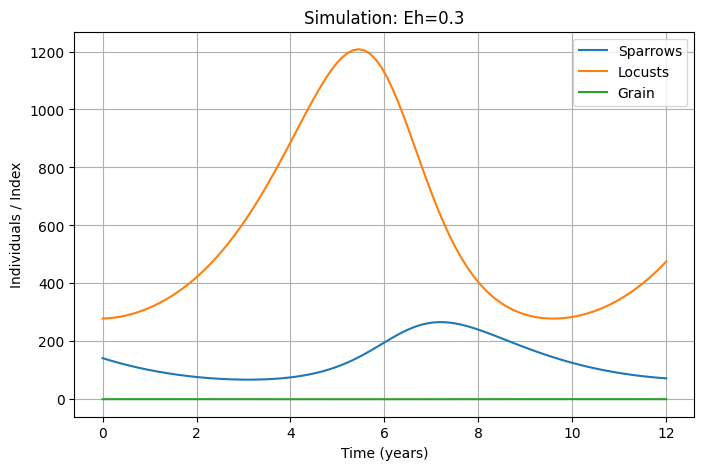

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         141.873 |         278.497 |           0.259
1955  |         135.907 |         279.534 |           0.295
1956  |         130.217 |         281.568 |           0.321
1957  |         124.803 |         284.572 |           0.340
1958  |         119.664 |         288.530 |           0.354
1959  |         114.799 |         293.431 |           0.363
1960  |         110.204 |         299.272 |           0.369
1961  |         105.873 |         306.055 |           0.373
1962  |         101.802 |         313.791 |           0.374
1963  |          97.985 |         322.491 |           0.373
1964  |          94.416 |         332.176 |           0.371
1965  |          91.090 |         342.866 |           0.368

--- Simulation 3 with params [7.12457379e-03 1.51529751e-03 2.24436791e+00 3.72012670e-03
 5.57698324e-03 2.28215366e-03 5.76348199e-02] ---


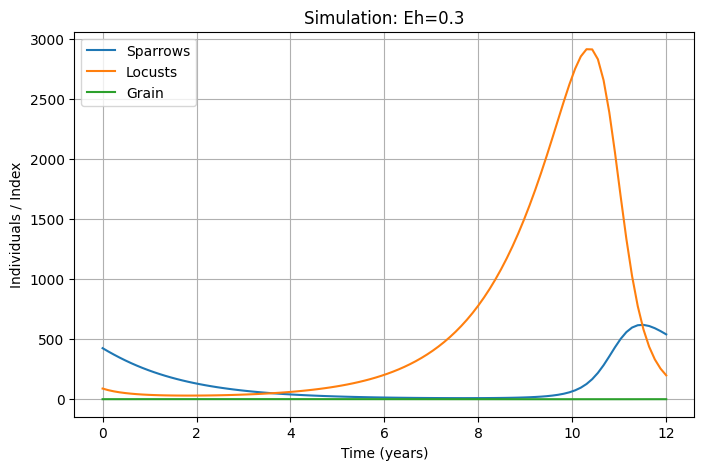

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         424.992 |          88.835 |           0.280
1955  |         397.516 |          75.599 |           0.333
1956  |         371.302 |          65.380 |           0.380
1957  |         346.431 |          57.445 |           0.420
1958  |         322.942 |          51.224 |           0.456
1959  |         300.845 |          46.280 |           0.488
1960  |         280.119 |          42.312 |           0.516
1961  |         260.712 |          39.152 |           0.543
1962  |         242.559 |          36.696 |           0.567
1963  |         225.609 |          34.763 |           0.589
1964  |         209.799 |          33.266 |           0.609
1965  |         195.065 |          32.138 |           0.628

--- Simulation 4 with params [0.00609855 0.0559384  1.75701845 0.00934815 0.00818284 0.00922492
 0.03668429] ---


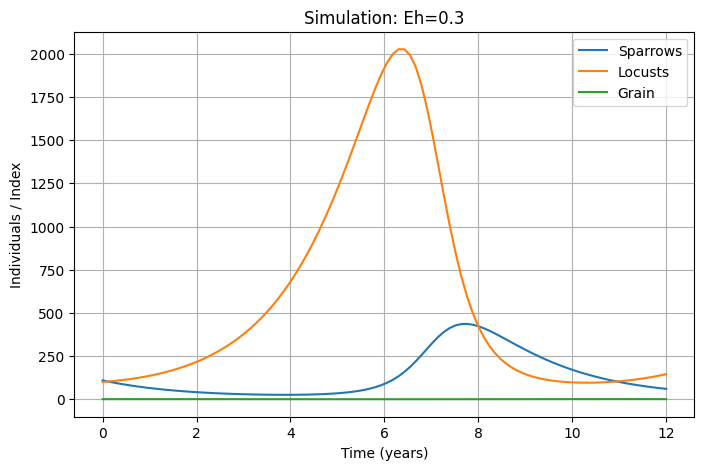

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         109.174 |         100.599 |           0.354
1955  |         102.361 |         103.022 |           0.402
1956  |          96.005 |         105.925 |           0.440
1957  |          90.077 |         109.316 |           0.471
1958  |          84.553 |         113.207 |           0.496
1959  |          79.408 |         117.617 |           0.515
1960  |          74.618 |         122.567 |           0.530
1961  |          70.162 |         128.084 |           0.541
1962  |          66.018 |         134.197 |           0.548
1963  |          62.167 |         140.944 |           0.553
1964  |          58.591 |         148.363 |           0.554
1965  |          55.273 |         156.499 |           0.553

--- Simulation 5 with params [0.00299227 0.06645975 1.32133143 0.00825901 0.00489431 0.00787046
 0.08178254] ---


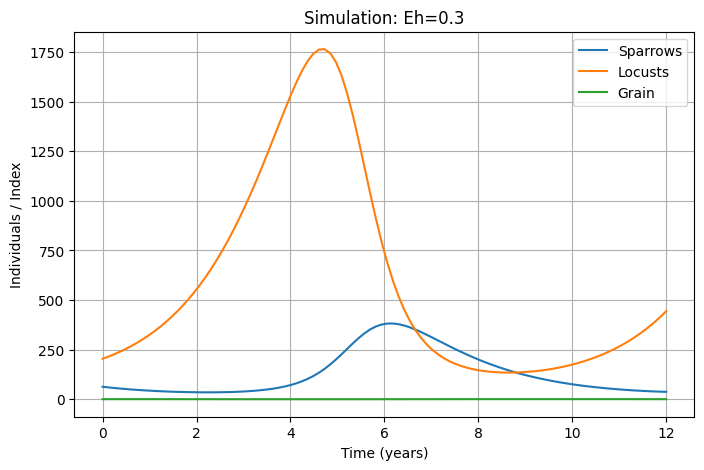

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          62.905 |         204.034 |           0.343
1955  |          59.753 |         214.650 |           0.373
1956  |          56.836 |         226.234 |           0.394
1957  |          54.140 |         238.849 |           0.407
1958  |          51.654 |         252.563 |           0.415
1959  |          49.368 |         267.451 |           0.417
1960  |          47.272 |         283.592 |           0.416
1961  |          45.358 |         301.074 |           0.411
1962  |          43.617 |         319.988 |           0.404
1963  |          42.042 |         340.431 |           0.395
1964  |          40.630 |         362.508 |           0.384
1965  |          39.374 |         386.329 |           0.372

--- Simulation 6 with params [2.03775704e-03 4.08719642e-02 2.15785738e+00 8.04325262e-03
 1.77239567e-03 9.58712171e-03 9.01476945e-02] ---


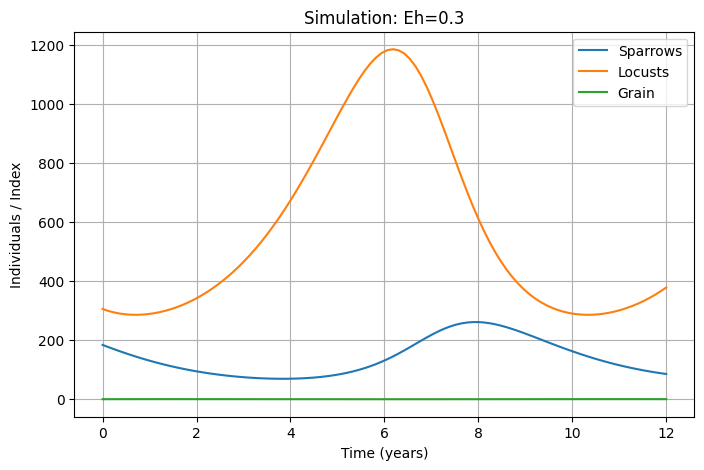

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         184.196 |         306.092 |           0.235
1955  |         176.960 |         299.565 |           0.273
1956  |         169.889 |         294.451 |           0.301
1957  |         163.012 |         290.651 |           0.323
1958  |         156.354 |         288.079 |           0.339
1959  |         149.931 |         286.665 |           0.352
1960  |         143.757 |         286.348 |           0.362
1961  |         137.841 |         287.082 |           0.369
1962  |         132.188 |         288.829 |           0.374
1963  |         126.801 |         291.559 |           0.378
1964  |         121.682 |         295.254 |           0.380
1965  |         116.828 |         299.902 |           0.381

--- Simulation 7 with params [0.00695332 0.08025976 1.02467463 0.00173244 0.00947726 0.00654889
 0.04499715] ---


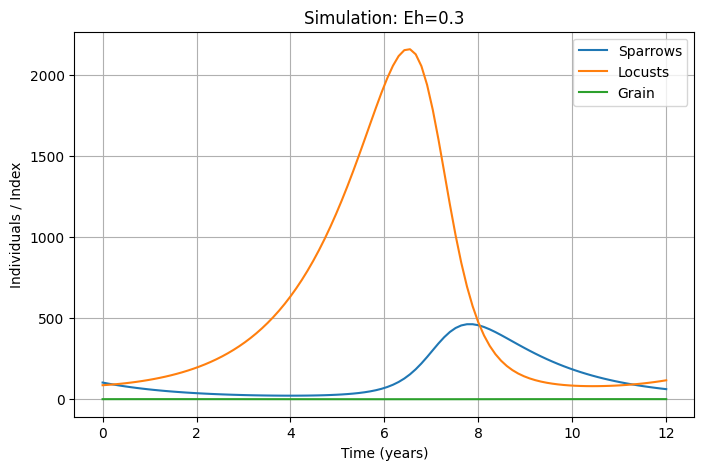

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         102.962 |          86.544 |           0.393
1955  |          96.373 |          88.957 |           0.437
1956  |          90.234 |          91.789 |           0.473
1957  |          84.517 |          95.053 |           0.503
1958  |          79.196 |          98.764 |           0.526
1959  |          74.246 |         102.938 |           0.544
1960  |          69.642 |         107.601 |           0.558
1961  |          65.363 |         112.777 |           0.569
1962  |          61.387 |         118.499 |           0.576
1963  |          57.695 |         124.800 |           0.581
1964  |          54.268 |         131.719 |           0.582
1965  |          51.090 |         139.301 |           0.581

--- Simulation 8 with params [0.00363023 0.02134784 2.4389475  0.00724059 0.00255339 0.00589102
 0.09263321] ---


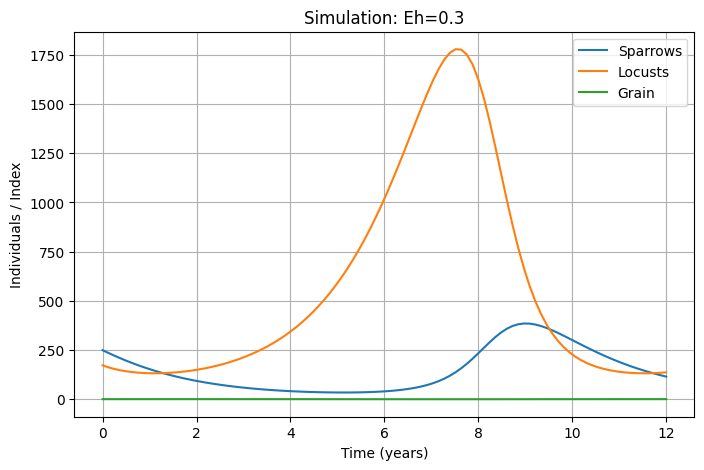

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         249.260 |         172.243 |           0.377
1955  |         235.565 |         162.372 |           0.400
1956  |         222.386 |         154.311 |           0.421
1957  |         209.759 |         147.805 |           0.440
1958  |         197.706 |         142.645 |           0.456
1959  |         186.239 |         138.654 |           0.471
1960  |         175.362 |         135.684 |           0.484
1961  |         165.075 |         133.618 |           0.495
1962  |         155.365 |         132.368 |           0.506
1963  |         146.215 |         131.875 |           0.515
1964  |         137.597 |         132.111 |           0.523
1965  |         129.494 |         133.027 |           0.529

--- Simulation 9 with params [0.00401214 0.05830651 2.0536261  0.00262307 0.00633707 0.00726806
 0.04903983] ---


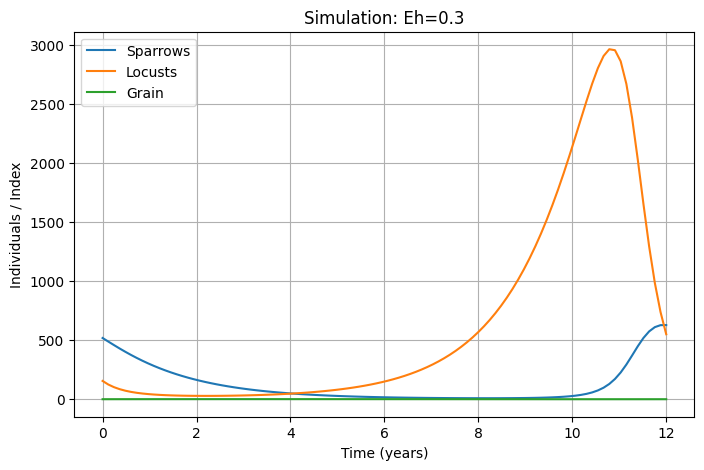

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         519.114 |         155.172 |           0.185
1955  |         488.940 |         124.828 |           0.248
1956  |         459.066 |         102.284 |           0.301
1957  |         429.988 |          85.299 |           0.347
1958  |         402.037 |          72.255 |           0.387
1959  |         375.395 |          62.134 |           0.424
1960  |         350.120 |          54.414 |           0.456
1961  |         326.272 |          48.401 |           0.487
1962  |         303.848 |          43.670 |           0.514
1963  |         282.820 |          39.924 |           0.539
1964  |         263.142 |          36.944 |           0.563
1965  |         244.755 |          34.582 |           0.584

--- Simulation 10 with params [0.00646665 0.00721449 1.07871198 0.00248778 0.0093383  0.00487189
 0.07551273] ---


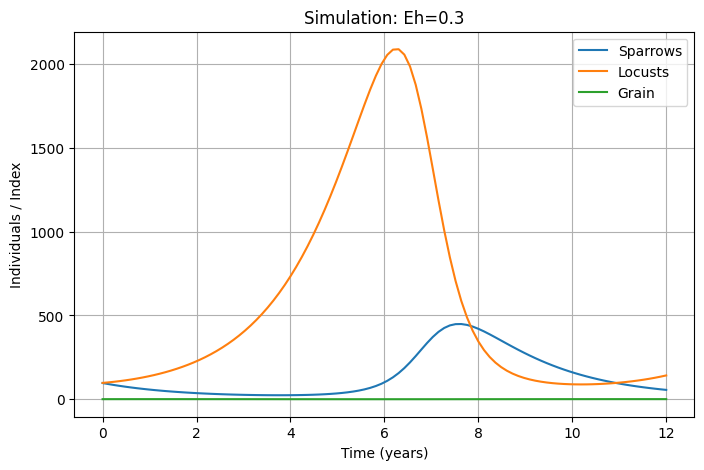

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          96.680 |          97.469 |           0.421
1955  |          90.616 |         100.552 |           0.457
1956  |          84.967 |         104.102 |           0.487
1957  |          79.707 |         108.133 |           0.511
1958  |          74.811 |         112.667 |           0.529
1959  |          70.256 |         117.728 |           0.543
1960  |          66.022 |         123.344 |           0.553
1961  |          62.087 |         129.548 |           0.559
1962  |          58.433 |         136.377 |           0.563
1963  |          55.042 |         143.873 |           0.565
1964  |          51.897 |         152.081 |           0.563
1965  |          48.982 |         161.053 |           0.560

--- Simulation 11 with params [0.00528669 0.05070933 0.59307261 0.00443891 0.00434862 0.00117683
 0.06481872] ---
Invalid result for case D, coexistence. 
Steady state no

/tmp/ipython-input-774662048.py:101: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  L_star = fsolve(coexistence_equation_scalar, L0)[0]


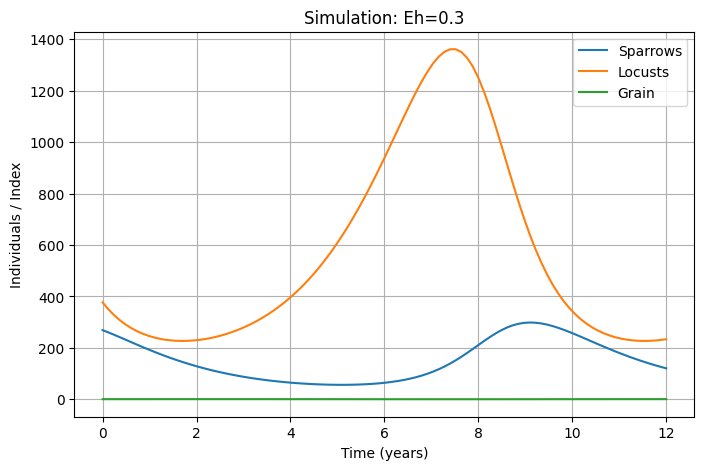

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         268.751 |         376.568 |           0.291
1955  |         260.090 |         350.267 |           0.301
1956  |         250.963 |         327.568 |           0.313
1957  |         241.539 |         308.069 |           0.324
1958  |         231.961 |         291.403 |           0.336
1959  |         222.348 |         277.245 |           0.348
1960  |         212.797 |         265.315 |           0.359
1961  |         203.387 |         255.364 |           0.369
1962  |         194.179 |         247.178 |           0.379
1963  |         185.222 |         240.575 |           0.388
1964  |         176.554 |         235.401 |           0.397
1965  |         168.199 |         231.530 |           0.404

--- Simulation 14 with params [0.00908152 0.06301354 1.57341548 0.00688582 0.00767354 0.00508881
 0.09496783] ---


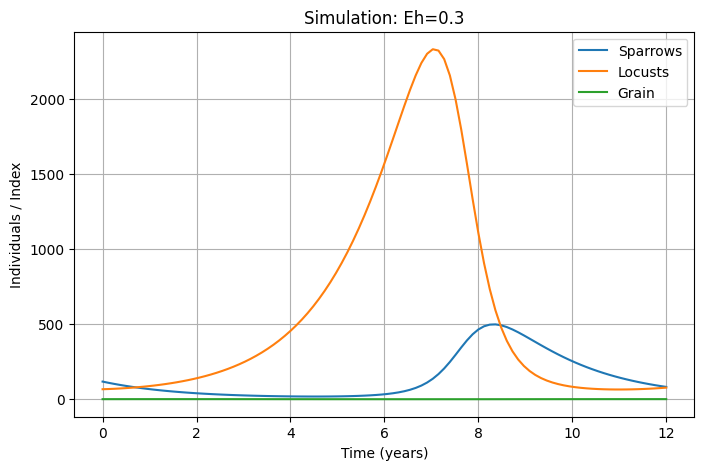

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         117.550 |          66.643 |           0.446
1955  |         109.755 |          67.923 |           0.485
1956  |         102.494 |          69.543 |           0.519
1957  |          95.734 |          71.505 |           0.546
1958  |          89.444 |          73.815 |           0.569
1959  |          83.592 |          76.480 |           0.588
1960  |          78.150 |          79.514 |           0.603
1961  |          73.091 |          82.932 |           0.614
1962  |          68.390 |          86.752 |           0.623
1963  |          64.022 |          90.996 |           0.630
1964  |          59.965 |          95.693 |           0.634
1965  |          56.199 |         100.870 |           0.636

--- Simulation 15 with params [0.00938825 0.07137725 0.87648714 0.00322008 0.00087748 0.00410621
 0.07018421] ---


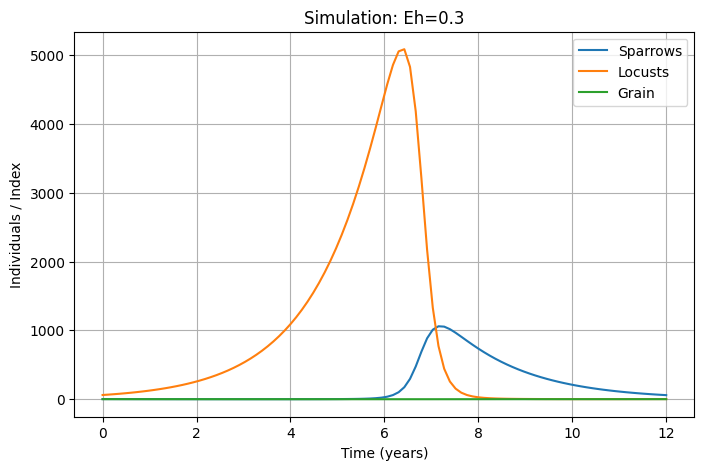

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |           2.472 |          61.399 |           0.797
1955  |           2.307 |          66.942 |           0.791
1956  |           2.155 |          72.993 |           0.783
1957  |           2.014 |          79.598 |           0.774
1958  |           1.884 |          86.807 |           0.763
1959  |           1.764 |          94.675 |           0.751
1960  |           1.654 |         103.262 |           0.737
1961  |           1.552 |         112.637 |           0.722
1962  |           1.458 |         122.871 |           0.706
1963  |           1.371 |         134.044 |           0.688
1964  |           1.292 |         146.241 |           0.669
1965  |           1.219 |         159.553 |           0.649

--- Simulation 16 with params [3.89707356e-03 9.73198069e-02 2.36441245e+00 2.00589219e-03
 2.21500726e-03 3.24880110e-03 1.92448024e-02] ---


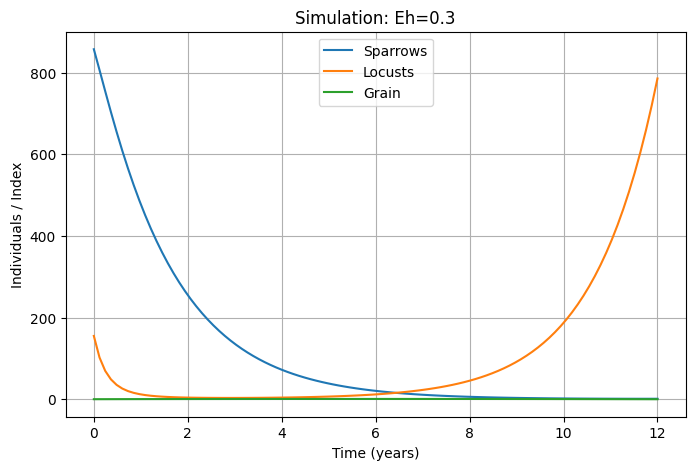

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         857.012 |         155.175 |           0.294
1955  |         805.966 |         102.327 |           0.323
1956  |         754.119 |          69.615 |           0.354
1957  |         703.358 |          48.859 |           0.385
1958  |         654.683 |          35.345 |           0.415
1959  |         608.551 |          26.327 |           0.443
1960  |         565.160 |          20.140 |           0.470
1961  |         524.532 |          15.807 |           0.496
1962  |         486.605 |          12.710 |           0.520
1963  |         451.277 |          10.445 |           0.543
1964  |         418.415 |           8.760 |           0.565
1965  |         387.876 |           7.495 |           0.585

--- Simulation 17 with params [4.30737964e-03 7.66594286e-02 1.79009827e+00 4.86535860e-03
 1.41128373e-03 6.74418568e-03 3.03707077e-02] ---


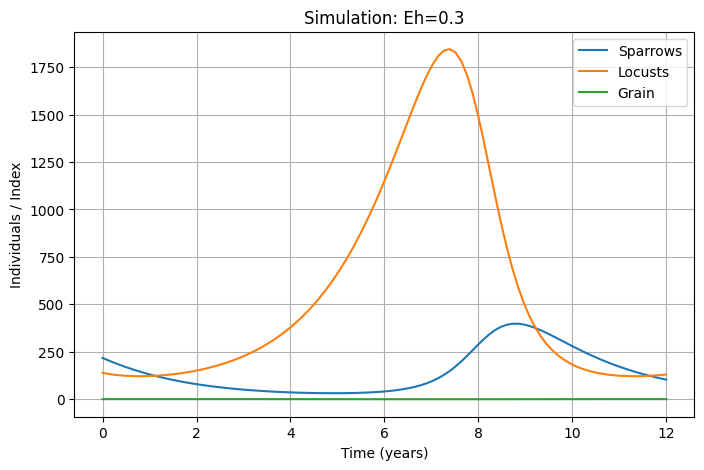

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         217.582 |         139.108 |           0.445
1955  |         204.859 |         133.640 |           0.462
1956  |         192.770 |         129.345 |           0.478
1957  |         181.312 |         126.080 |           0.492
1958  |         170.475 |         123.739 |           0.504
1959  |         160.245 |         122.232 |           0.515
1960  |         150.606 |         121.480 |           0.525
1961  |         141.541 |         121.421 |           0.534
1962  |         133.027 |         122.007 |           0.542
1963  |         125.041 |         123.203 |           0.548
1964  |         117.557 |         124.990 |           0.553
1965  |         110.547 |         127.358 |           0.557

--- Simulation 18 with params [0.00272739 0.02350553 1.45678531 0.00979668 0.00682794 0.00740568
 0.08282784] ---


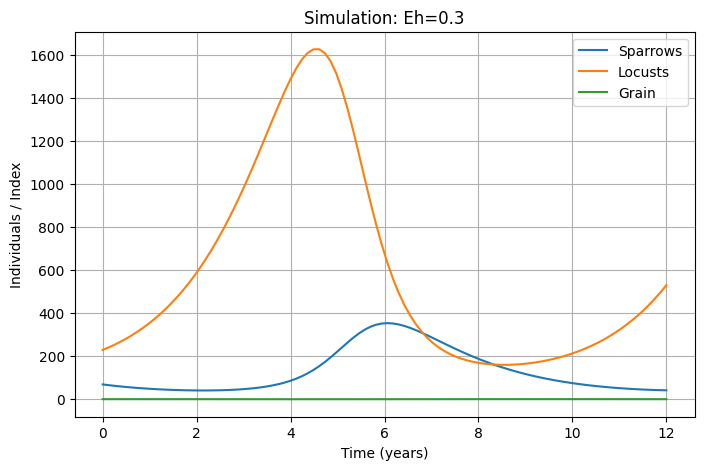

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          68.932 |         229.493 |           0.315
1955  |          65.682 |         240.561 |           0.346
1956  |          62.674 |         252.641 |           0.368
1957  |          59.894 |         265.793 |           0.382
1958  |          57.334 |         280.082 |           0.390
1959  |          54.981 |         295.579 |           0.392
1960  |          52.829 |         312.360 |           0.391
1961  |          50.868 |         330.505 |           0.387
1962  |          49.092 |         350.099 |           0.380
1963  |          47.496 |         371.235 |           0.371
1964  |          46.073 |         394.007 |           0.361
1965  |          44.822 |         418.515 |           0.350

--- Simulation 19 with params [0.00479487 0.03088069 1.15441362 0.00904422 0.00715629 0.00344226
 0.06205815] ---


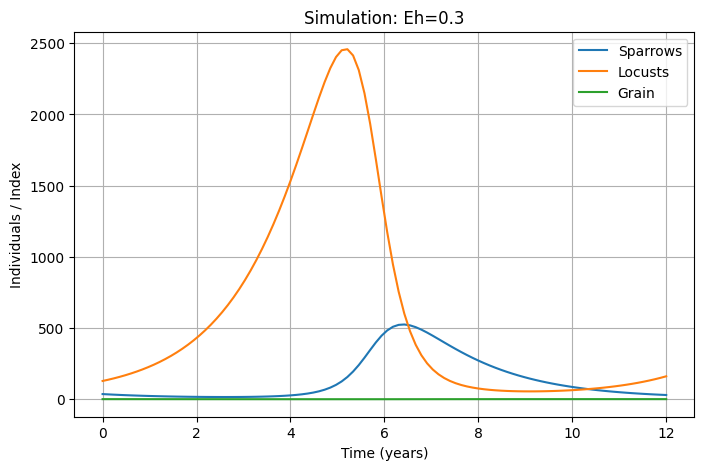

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          36.219 |         128.299 |           0.588
1955  |          34.087 |         137.132 |           0.588
1956  |          32.115 |         146.757 |           0.585
1957  |          30.295 |         157.237 |           0.580
1958  |          28.616 |         168.643 |           0.573
1959  |          27.068 |         181.053 |           0.563
1960  |          25.645 |         194.552 |           0.551
1961  |          24.338 |         209.231 |           0.538
1962  |          23.141 |         225.188 |           0.523
1963  |          22.047 |         242.531 |           0.508
1964  |          21.050 |         261.375 |           0.491
1965  |          20.147 |         281.844 |           0.473

--- Simulation 20 with params [0.00947796 0.06916574 2.38470914 0.00788454 0.00386297 0.00874509
 0.06929717] ---


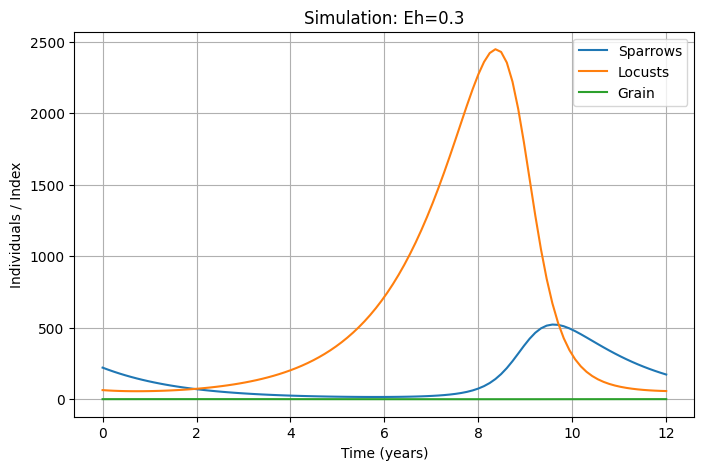

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         220.991 |          63.796 |           0.415
1955  |         206.216 |          61.200 |           0.455
1956  |         192.376 |          59.216 |           0.491
1957  |         179.427 |          57.765 |           0.521
1958  |         167.324 |          56.783 |           0.548
1959  |         156.023 |          56.222 |           0.571
1960  |         145.478 |          56.037 |           0.591
1961  |         135.647 |          56.197 |           0.609
1962  |         126.486 |          56.678 |           0.624
1963  |         117.951 |          57.467 |           0.638
1964  |         110.005 |          58.557 |           0.649
1965  |         102.610 |          59.947 |           0.659

--- Simulation 21 with params [1.53587428e-03 9.54321083e-02 1.51140678e+00 1.23071458e-03
 9.78708743e-03 7.93243771e-03 1.69339892e-02] ---


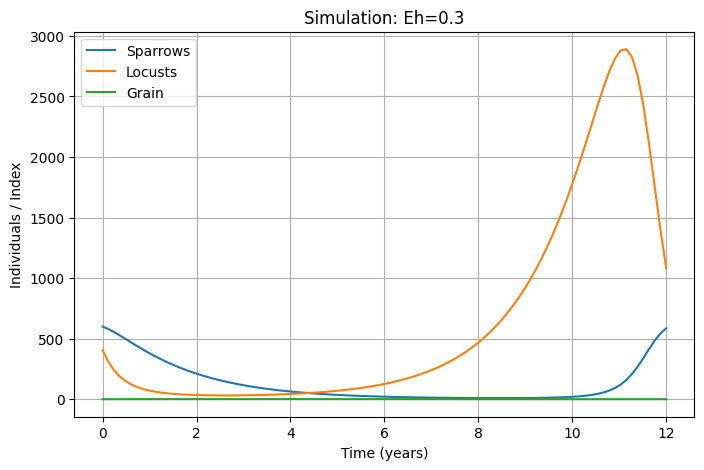

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         599.747 |         406.203 |           0.099
1955  |         579.898 |         310.124 |           0.166
1956  |         555.136 |         240.003 |           0.219
1957  |         527.575 |         188.645 |           0.263
1958  |         498.698 |         150.904 |           0.304
1959  |         469.538 |         122.872 |           0.340
1960  |         440.782 |         101.764 |           0.374
1961  |         412.870 |          85.709 |           0.406
1962  |         386.057 |          73.459 |           0.436
1963  |         360.511 |          63.975 |           0.463
1964  |         336.311 |          56.561 |           0.489
1965  |         313.488 |          50.712 |           0.514

--- Simulation 22 with params [0.00113292 0.01553003 0.92390643 0.00367521 0.0058711  0.00150551
 0.02504834] ---


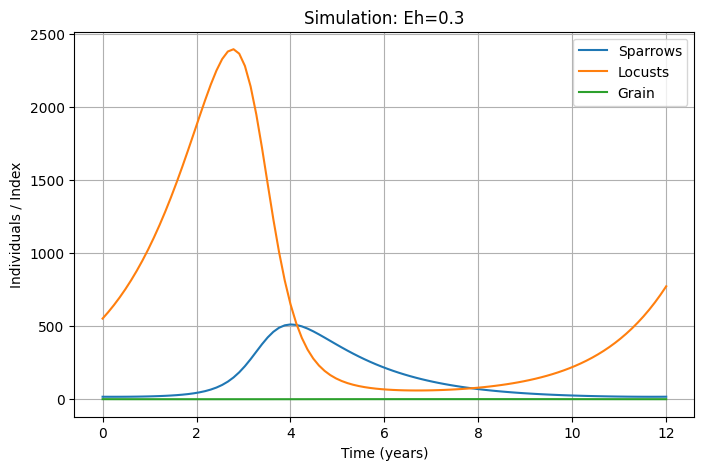

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          17.004 |         551.926 |           0.518
1955  |          16.882 |         596.470 |           0.420
1956  |          16.855 |         644.638 |           0.350
1957  |          16.931 |         696.686 |           0.300
1958  |          17.119 |         752.877 |           0.263
1959  |          17.432 |         813.477 |           0.236
1960  |          17.886 |         878.751 |           0.214
1961  |          18.504 |         948.956 |           0.197
1962  |          19.313 |        1024.328 |           0.182
1963  |          20.348 |        1105.071 |           0.168
1964  |          21.657 |        1191.335 |           0.157
1965  |          23.301 |        1283.189 |           0.146

--- Simulation 23 with params [0.00560272 0.03694443 1.66777851 0.0075714  0.0034525  0.00386996
 0.04128739] ---


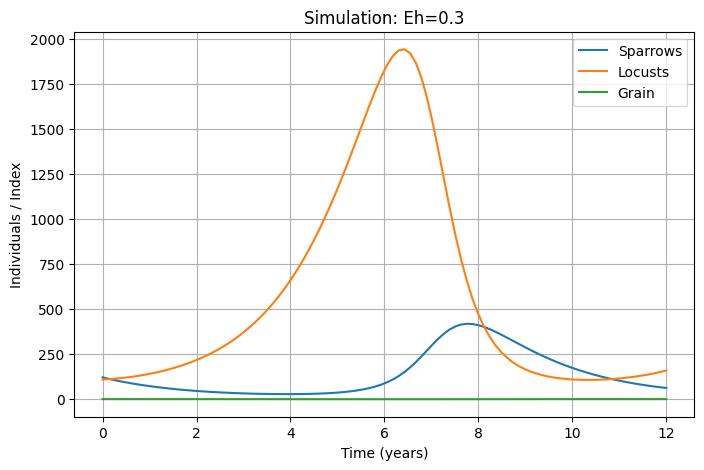

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         121.239 |         109.461 |           0.543
1955  |         113.791 |         111.302 |           0.553
1956  |         106.829 |         113.668 |           0.561
1957  |         100.324 |         116.558 |           0.568
1958  |          94.252 |         119.979 |           0.573
1959  |          88.586 |         123.942 |           0.576
1960  |          83.304 |         128.464 |           0.577
1961  |          78.382 |         133.564 |           0.576
1962  |          73.800 |         139.267 |           0.575
1963  |          69.536 |         145.601 |           0.572
1964  |          65.571 |         152.601 |           0.568
1965  |          61.888 |         160.308 |           0.562

--- Simulation 24 with params [6.37718477e-03 9.04273958e-02 1.85302519e+00 5.21782951e-03
 7.93953613e-03 1.77656408e-03 6.03265239e-02] ---


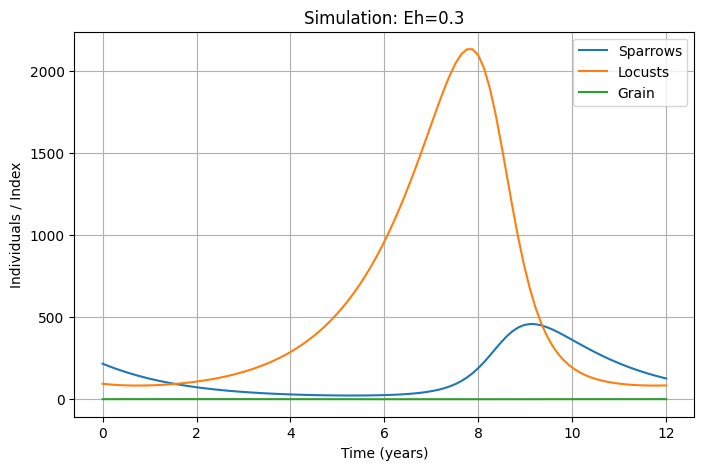

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         216.753 |          94.404 |           0.346
1955  |         202.999 |          90.767 |           0.392
1956  |         190.046 |          87.977 |           0.432
1957  |         177.866 |          85.927 |           0.465
1958  |         166.431 |          84.530 |           0.493
1959  |         155.711 |          83.718 |           0.517
1960  |         145.672 |          83.434 |           0.538
1961  |         136.280 |          83.640 |           0.556
1962  |         127.500 |          84.309 |           0.571
1963  |         119.299 |          85.421 |           0.584
1964  |         111.643 |          86.966 |           0.595
1965  |         104.501 |          88.939 |           0.603

--- Simulation 25 with params [7.94339701e-03 1.75874032e-02 1.29773720e+00 4.12824400e-03
 3.70615945e-04 6.17844025e-03 9.78752287e-02] ---


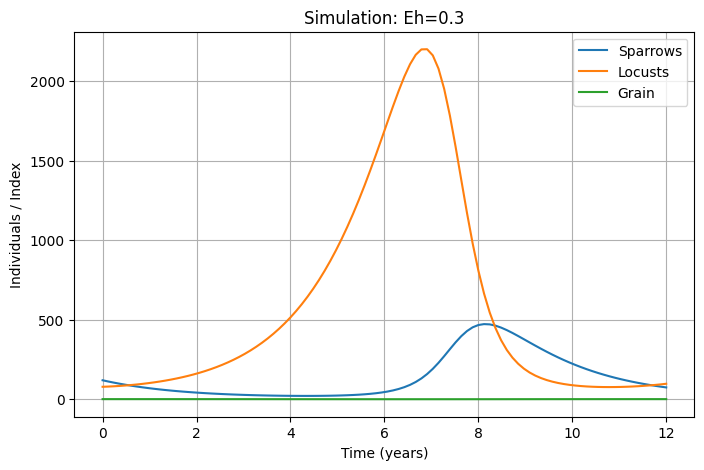

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         119.275 |          78.282 |           0.655
1955  |         111.524 |          79.701 |           0.656
1956  |         104.296 |          81.513 |           0.657
1957  |          97.560 |          83.719 |           0.657
1958  |          91.286 |          86.325 |           0.657
1959  |          85.444 |          89.342 |           0.657
1960  |          80.008 |          92.783 |           0.656
1961  |          74.951 |          96.665 |           0.654
1962  |          70.249 |         101.008 |           0.651
1963  |          65.878 |         105.836 |           0.648
1964  |          61.818 |         111.174 |           0.644
1965  |          58.047 |         117.058 |           0.638

--- Simulation 26 with params [0.00512732 0.04866826 1.20949206 0.00655255 0.00667746 0.00293417
 0.08663649] ---


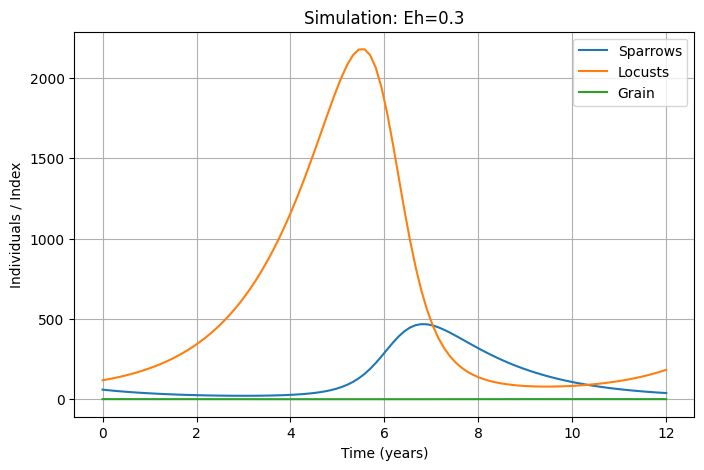

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |          59.659 |         118.081 |           0.573
1955  |          56.068 |         124.487 |           0.578
1956  |          52.736 |         131.515 |           0.581
1957  |          49.647 |         139.211 |           0.580
1958  |          46.784 |         147.622 |           0.578
1959  |          44.134 |         156.803 |           0.573
1960  |          41.682 |         166.813 |           0.566
1961  |          39.416 |         177.716 |           0.558
1962  |          37.324 |         189.581 |           0.548
1963  |          35.397 |         202.486 |           0.536
1964  |          33.624 |         216.512 |           0.524
1965  |          31.997 |         231.747 |           0.510

--- Simulation 27 with params [9.76013334e-03 1.14608914e-02 1.99281558e+00 3.04158784e-03
 5.84723328e-04 8.36789048e-03 2.46618127e-02] ---


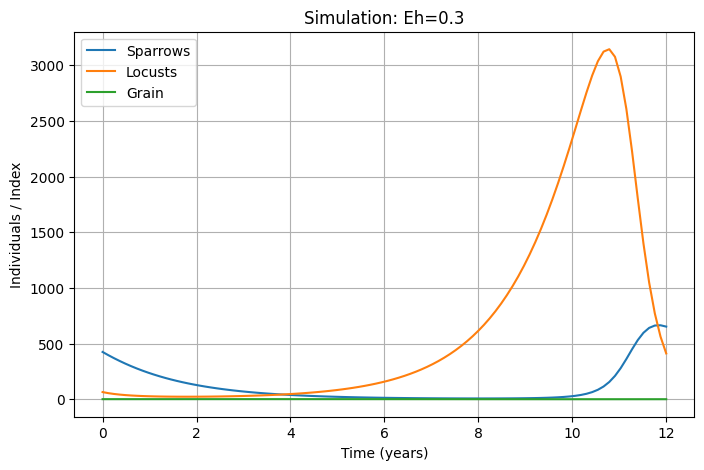

Year |   S (sparrows)   |   L (locusts)   |   G (grain)
----------------------------------------------------
1954  |         424.692 |          64.232 |           0.560
1955  |         396.145 |          54.691 |           0.565
1956  |         369.145 |          47.348 |           0.573
1957  |         343.711 |          41.662 |           0.584
1958  |         319.831 |          37.217 |           0.596
1959  |         297.469 |          33.704 |           0.609
1960  |         276.568 |          30.917 |           0.622
1961  |         257.057 |          28.716 |           0.636
1962  |         238.866 |          26.979 |           0.649
1963  |         221.919 |          25.623 |           0.662
1964  |         206.146 |          24.579 |           0.675
1965  |         191.473 |          23.795 |           0.687

--- Simulation 28 with params [0.00840872 0.03522167 0.53203187 0.00138186 0.00170529 0.00196767
 0.03266389] ---
Invalid result for case D, coexistence. 
Steady state no

[array([0.00874157, 0.08838958, 1.39994189, 0.00508548, 0.00890777,
        0.00987217, 0.03905073]),
 array([0.00226869, 0.00583011, 1.93274354, 0.00861797, 0.00280116,
        0.00885024, 0.01569502]),
 array([7.12457379e-03, 1.51529751e-03, 2.24436791e+00, 3.72012670e-03,
        5.57698324e-03, 2.28215366e-03, 5.76348199e-02]),
 array([0.00609855, 0.0559384 , 1.75701845, 0.00934815, 0.00818284,
        0.00922492, 0.03668429]),
 array([0.00299227, 0.06645975, 1.32133143, 0.00825901, 0.00489431,
        0.00787046, 0.08178254]),
 array([2.03775704e-03, 4.08719642e-02, 2.15785738e+00, 8.04325262e-03,
        1.77239567e-03, 9.58712171e-03, 9.01476945e-02]),
 array([0.00695332, 0.08025976, 1.02467463, 0.00173244, 0.00947726,
        0.00654889, 0.04499715]),
 array([0.00363023, 0.02134784, 2.4389475 , 0.00724059, 0.00255339,
        0.00589102, 0.09263321]),
 array([0.00401214, 0.05830651, 2.0536261 , 0.00262307, 0.00633707,
        0.00726806, 0.04903983]),
 array([0.00646665, 0.0072

In [12]:
import numpy as np
from scipy.stats import qmc

def run_lhs_simulations(n_samples=10, Eh=0.0, param_bounds=None):
  #General approach of Latin hypercube sampling and sample inputs not original
  #Customized range, finding initial steady state before solving the equations
  #Also spent a lot of time dealing with weird behavior
    # global params  # reuse the global params variable

    if param_bounds is None:
        # Default bounds for each parameter (a1, a2, b1, b5, c1, c2, c3)
        param_bounds = [
            (0.001, 0.01),   # a1
            (0.0, 0.1),      # a2
            (0.5, 2.5),       # b1
            (0.001, 0.01),    # b5
            (0.0001, 0.01),   # c1
            (0.001, 0.01),    # c2
            (0.01, 0.1)       # c3
        ]

    # Create LHS sampler
    sampler = qmc.LatinHypercube(d=len(param_bounds))
    sample = sampler.random(n=n_samples)

    # Scale samples to parameter bounds
    l_bounds = [low for low, high in param_bounds]
    u_bounds = [high for low, high in param_bounds]
    scaled_samples = qmc.scale(sample, l_bounds, u_bounds)

    results = []


    def f(L: float) -> float:
        return b1 + (b2 * (L**2))/(b3**2 + L**2)

    def dfdx(L: float) -> float:
        return (2 * b2 * (b3**2) * L)/((b3**2 + L**2) ** 2)
    def coexistence_equation_scalar(L: float) -> float:
        """
        It is possible to solve for the values of S and G in terms of L.

        We build an equation whose root corresponds to the L at a steady state,
        so we can calculate S and G from that root.

        Deriving this function:

        dL/dt = 0 gets us to f(L) - b4 - b5 * S = 0, so S(L) = (f(L) - b4) / b5

        dG/dt = 0 gets us to G(L) = 1 / (c1 * S(L) + c2 * L + c3)

        dS/dt = 0 gets us to a1 * S * L + a2 * S * G - a3 * S - Eh * S = 0.
        Since S > 0, we can write this as a1 * L + a2 * G = a3 + Eh.

        > a1 * L + a2 * G = a3 + Eh <  is true at equilibrium.
        So then, we can set F(L) = a1*L + a2 / (c1*S(L) + c2*L + c3) - (a3 + Eh)
        and having this value equal to 0 gives us the L at equilibrium.

        We then use a root solver on F.
        """
        if L <= 0:
            return float("nan")

        S = (f(L) - b4) / b5
        if S < 0:
            return float("nan")

        denom = c1*S + c2*L + c3
        G = 1.0 / denom
        if G < 0:
            return float("nan")

        return a1*L + a2*G - (a3 + Eh)


    for i, param_set in enumerate(scaled_samples):
        print(f"\n--- Simulation {i+1} with params {param_set} ---")
        params = param_set  # update global params
        a1, a2, b1, b5, c1, c2, c3 = params

        #Sparrows live 3 years on average
        a3 = 1/3

        #Locusts die and lay new eggs every year
        b4 = 1

        #Locusts multiply about 15% faster while gregarious
        b2 = 0.15 * b1

        #To make the locusts swarms turn on quickly
        b3 = 0.01

        c3 = 1
        def find_coexistence_equilibrium_fsolve():
            """
            Shove our problems at scipy and win.
            """
            L0 = 1.0
            Eh = 0.0

            L_star = fsolve(coexistence_equation_scalar, L0)[0]

            if L_star <= 0 or not np.isfinite(L_star):
                print("fsolve returned invalid L*")
                return None

            S_star = (f(L_star) - b4) / b5
            denom = c1*S_star + c2*L_star + c3
            G_star = 1.0 / denom

            if S_star < 0 or G_star < 0:
                print("Invalid result for case D, coexistence. ")
                return None

            return S_star, L_star, G_star


        steadyState = find_coexistence_equilibrium_fsolve()
        if steadyState is None:
            print("Steady state not found")
            continue
        S0, L0, G0 = find_coexistence_equilibrium_fsolve()
        run_simulation(Eh=Eh, S0=S0, L0=L0, G0=G0)
        results.append(param_set)

    return results

run_lhs_simulations(n_samples = 30, Eh = 0.3)